<a href="https://colab.research.google.com/github/felipeaninir/sales-predictions/blob/main/data_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/PTDataScience/PandasParaManipulaciónDeDatos/sales_predictions.csv')
print(df.shape)
df.head()

(8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<BarContainer object of 10 artists>

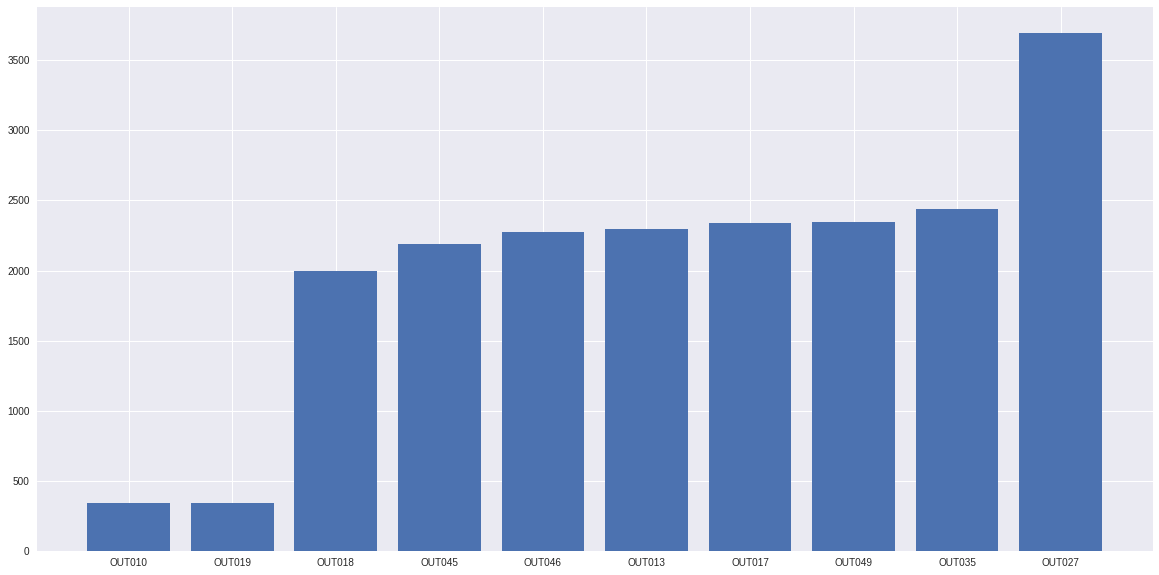

In [5]:
mean_sales = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().sort_values(ascending = True)
plt.figure(figsize=(20, 10))
plt.style.use('seaborn')
plt.bar(mean_sales.index, mean_sales.values)

Text(0, 0.5, 'Frequency')

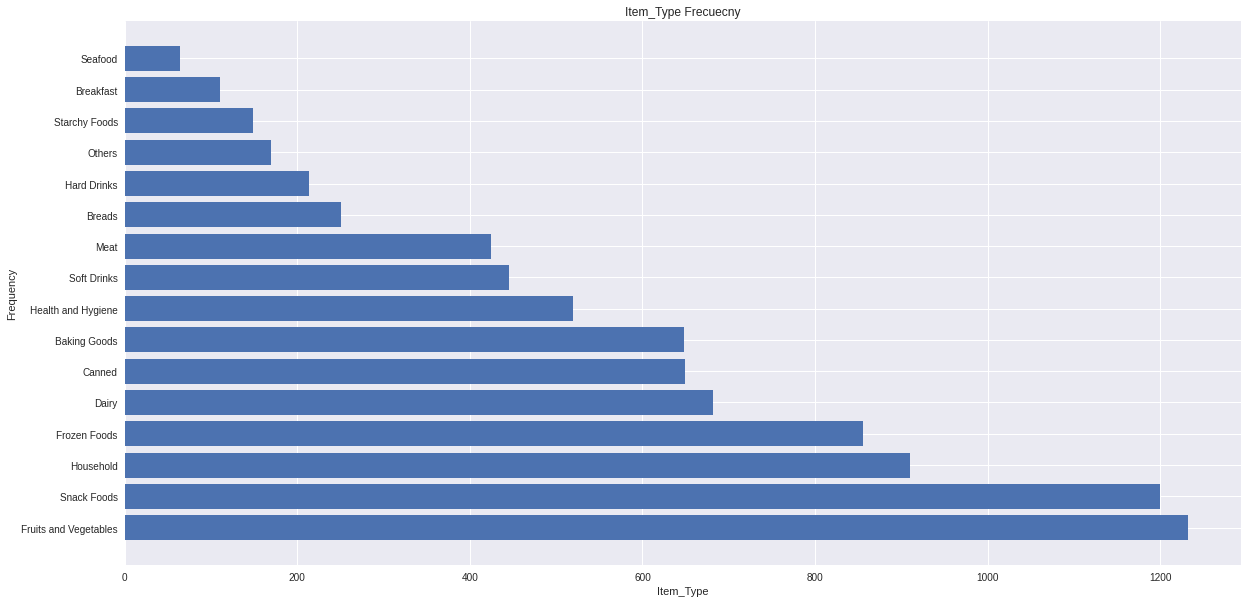

In [6]:
plt.figure(figsize=(20, 10))
plt.barh(df['Item_Type'].value_counts().index, df['Item_Type'].value_counts(), align='center', data=df)
plt.title('Item_Type Frecuecny')
plt.xlabel('Item_Type')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

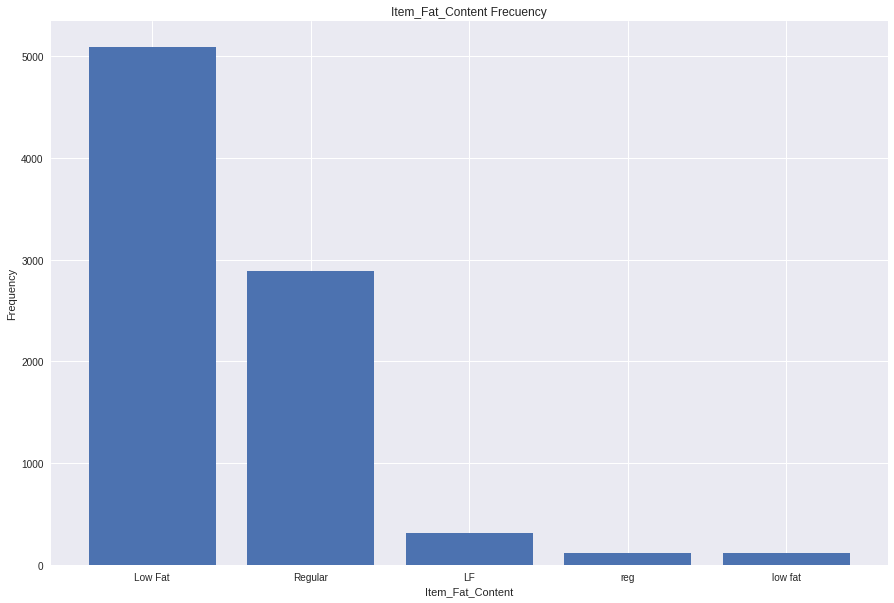

In [7]:
plt.figure(figsize=(15, 10))
plt.bar(df['Item_Fat_Content'].value_counts().index, df['Item_Fat_Content'].value_counts(), data=df)
plt.title('Item_Fat_Content Frecuency')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Frequency')

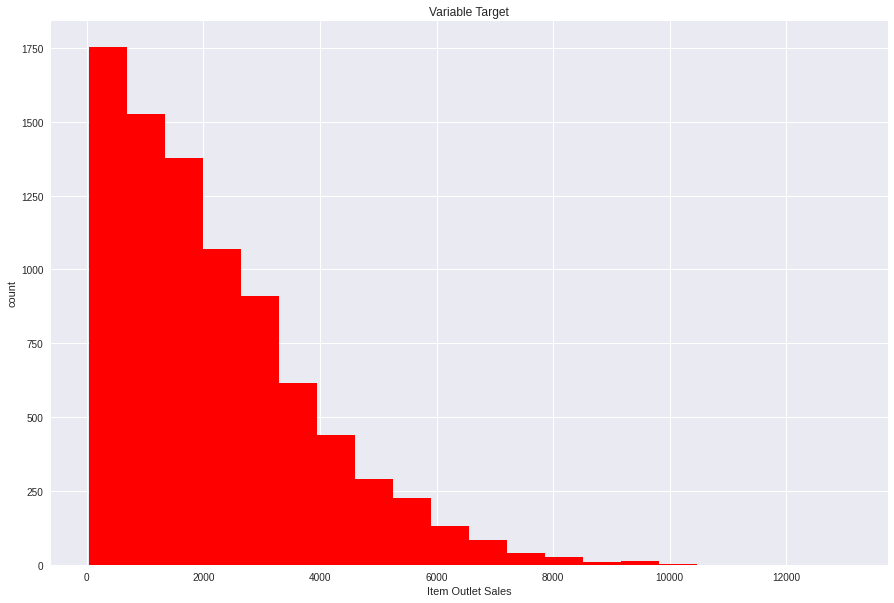

In [8]:
plt.figure(figsize=(15, 10))
plt.hist(df['Item_Outlet_Sales'], bins = 20, color = 'red')
plt.title('Variable Target')
plt.xlabel('Item Outlet Sales')
plt.ylabel('count')
plt.show()

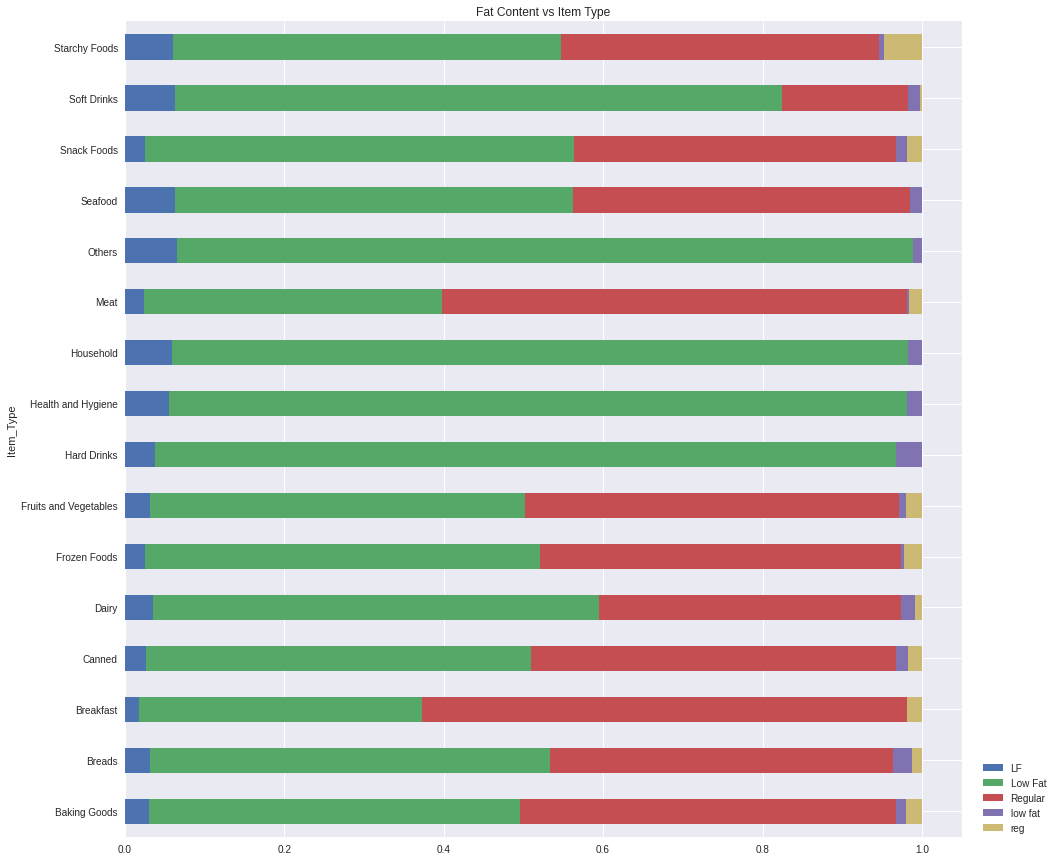

In [9]:
Item_Type = pd.crosstab(df['Item_Type'], df['Item_Fat_Content'])
Item_Type.div(Item_Type.sum(1).astype(float), axis=0).plot(kind="barh", stacked=True, figsize=(15, 15))
plt.title('Fat Content vs Item Type')
plt.legend(loc=(1.02,0))

#Data Cleaning + Data Visualization

In [22]:
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,1.83,2181.29
std,4.23,0.05,62.28,8.37,0.60,1706.50
min,4.56,0.00,31.29,1985.00,1.00,33.29
25%,9.31,0.03,93.83,1987.00,1.00,834.25
50%,12.86,0.05,143.01,1999.00,2.00,1794.33
75%,16.00,0.09,185.64,2004.00,2.00,3101.30
max,21.35,0.33,266.89,2009.00,3.00,13086.96


In [15]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
# Rellenado de los valores nulos con la media
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
# "Mapeo"" de los valores categóricos y luego reemplazándolos con el valor de la mediana
df['Outlet_Size'] = df['Outlet_Size'].map({'Small':1, 'Medium':2, 'High':3})

print("Media : ", df['Outlet_Size'].median())
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].median())
df.isnull().sum()

Media :  2.0


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [28]:
corr = df[[ 'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Size' ]]
corr

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Size
0,9.300,0.016047,249.8092,3735.1380,2.0
1,5.920,0.019278,48.2692,443.4228,2.0
2,17.500,0.016760,141.6180,2097.2700,2.0
3,19.200,0.000000,182.0950,732.3800,2.0
4,8.930,0.000000,53.8614,994.7052,3.0
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,3.0
8519,8.380,0.046982,108.1570,549.2850,2.0
8520,10.600,0.035186,85.1224,1193.1136,1.0
8521,7.210,0.145221,103.1332,1845.5976,2.0


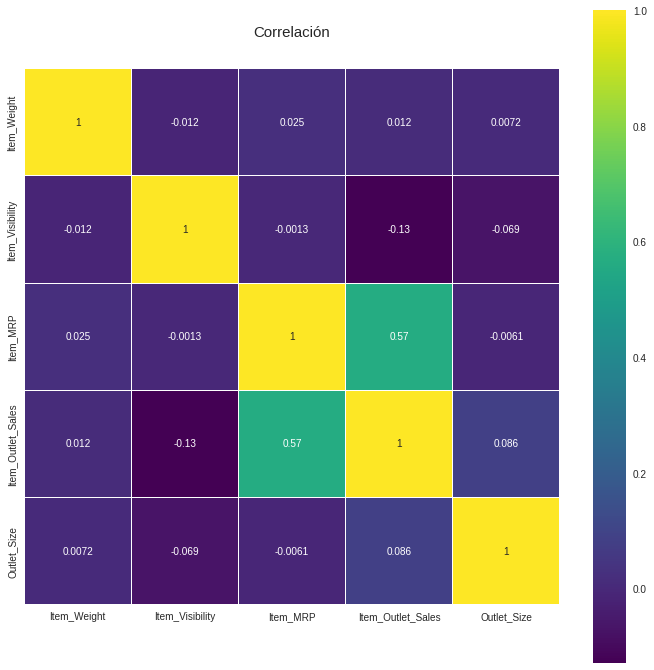

In [29]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlación', y=1.05, size=15)
sns.heatmap(corr.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

{'boxes': [<matplotlib.lines.Line2D at 0x7f2e5a8ace50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2e5a8b7e50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2e5a83fe10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2e5a83f910>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2e5a8b73d0>,
  <matplotlib.lines.Line2D at 0x7f2e5a8b7910>]}

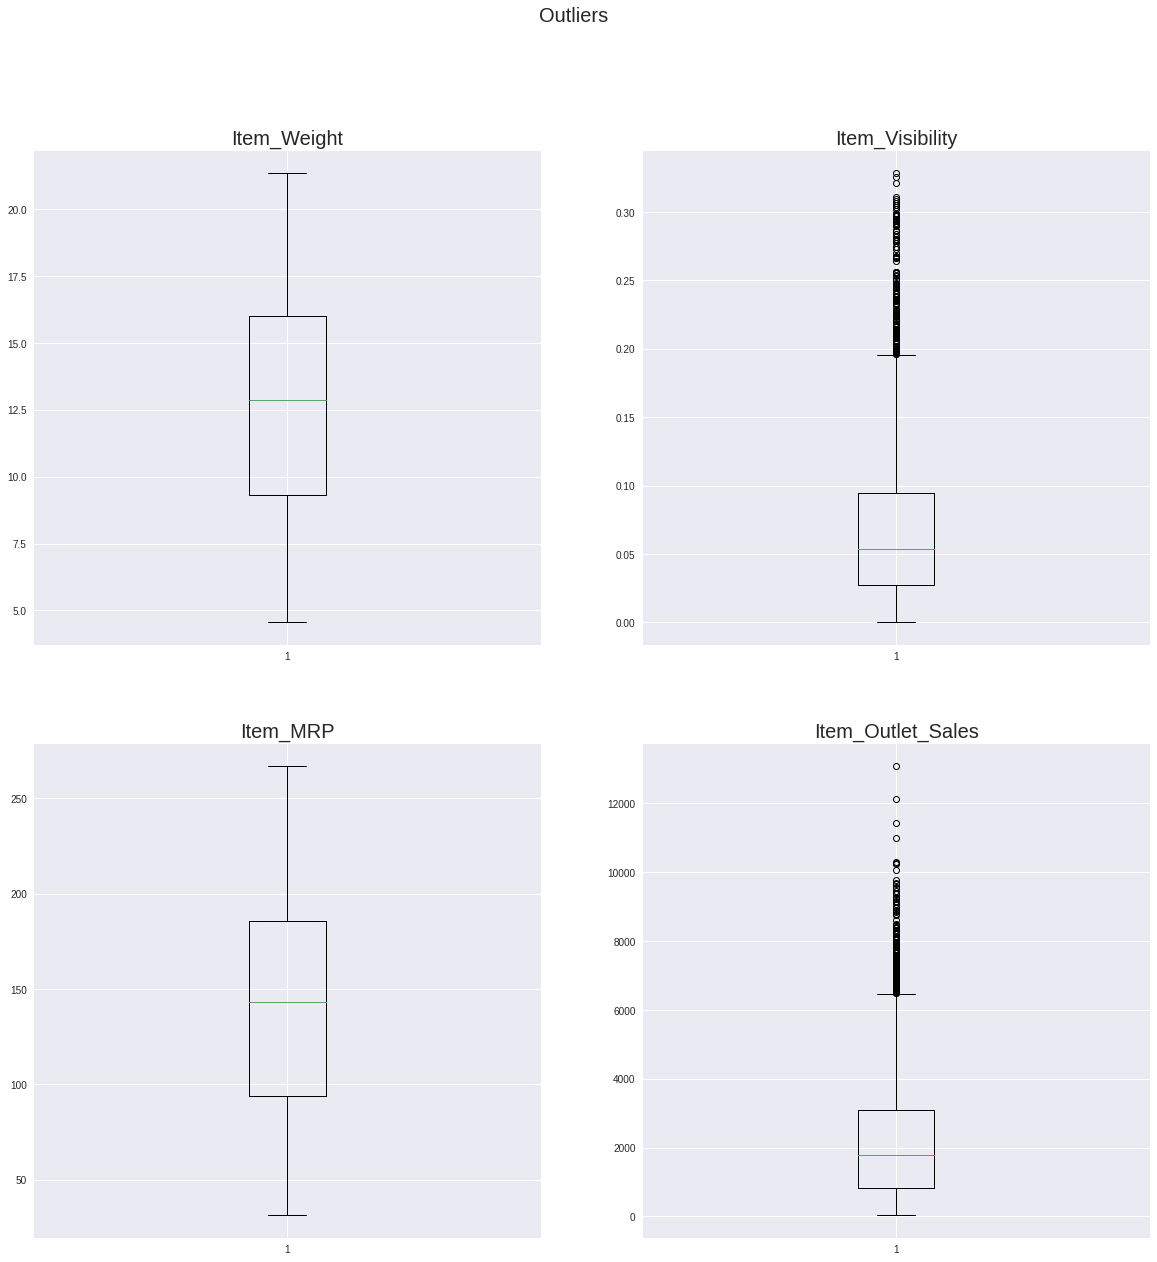

In [27]:
plt.rcParams["figure.figsize"] = (20, 20)  
fig, axes = plt.subplots(2, 2) 
fig.suptitle('Outliers', fontsize=20)

axes[0,0].set_title('Item_Weight', fontsize=20)
axes[0,1].set_title('Item_Visibility', fontsize=20)
axes[1,0].set_title('Item_MRP', fontsize=20)
axes[1,1].set_title('Item_Outlet_Sales', fontsize=20)


axes[0,0].boxplot('Item_Weight',data=df)
axes[0,1].boxplot('Item_Visibility',data=df)
axes[1,0].boxplot('Item_MRP',data=df)
axes[1,1].boxplot('Item_Outlet_Sales',data=df)